In [2]:
import pandas, numpy
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
applications = pandas.read_csv("./application_record.csv")
credit_records = pandas.read_csv("./credit_record.csv")

In [4]:
# Let's take a look at each dataset individually 
applications.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [5]:
# Lets' see how the credit record looks like 
# 1 - due less 30 days
# 2 - due 30 - 60 days 
# 3 - due 60 - 90 days
# 4 - due 90 - 150 days 
# 5 - due over 150 days 

credit_records.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [6]:
# Relabling Credit Records Dataset

CREDIT_MAPPING = {
    "ID": "client_id",
    "STATUS": "due_status",
    "MONTHS_BALANCE": "balance_month"
}
credit_records.rename(columns=CREDIT_MAPPING, inplace=True)

# Relabling Applications Records Dataset
APPLICATION_MAPPING = {
    "ID": "client_id",
    "CODE_GENDER": "gender",
    "FLAG_OWN_CAR": "has_car",
    "FLAG_OWN_REALTY": "has_realty",
    "CNT_CHILDREN": "total_children",
    "AMT_INCOME_TOTAL": "annual_income",
    "NAME_INCOME_TYPE": "income_category",
    "NAME_EDUCATION_TYPE": "education_category",
    "NAME_FAMILY_STATUS": "family_status",
    "NAME_HOUSING_TYPE": "living_place",
    "DAYS_BIRTH": "birthday",
    "FLAG_MOBIL": "has_mobile_phone",
    "FLAG_PHONE": "has_phone",
    "FLAG_WORK_PHONE": "has_work_phone",
    "FLAG_EMAIL": "has_email",
    "CNT_FAM_MEMBERS": "family_size",
    "OCCUPATION_TYPE": "job",
    'DAYS_EMPLOYED': 'days_employed',
}

applications.rename(columns=APPLICATION_MAPPING, inplace=True)

In [7]:
# Editing Dataset Labels for better understanding and easier usage 
applications.info()
applications.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   client_id           438557 non-null  int64  
 1   gender              438557 non-null  object 
 2   has_car             438557 non-null  object 
 3   has_realty          438557 non-null  object 
 4   total_children      438557 non-null  int64  
 5   annual_income       438557 non-null  float64
 6   income_category     438557 non-null  object 
 7   education_category  438557 non-null  object 
 8   family_status       438557 non-null  object 
 9   living_place        438557 non-null  object 
 10  birthday            438557 non-null  int64  
 11  days_employed       438557 non-null  int64  
 12  has_mobile_phone    438557 non-null  int64  
 13  has_work_phone      438557 non-null  int64  
 14  has_phone           438557 non-null  int64  
 15  has_email           438557 non-nul

client_id                  0
gender                     0
has_car                    0
has_realty                 0
total_children             0
annual_income              0
income_category            0
education_category         0
family_status              0
living_place               0
birthday                   0
days_employed              0
has_mobile_phone           0
has_work_phone             0
has_phone                  0
has_email                  0
job                   134203
family_size                0
dtype: int64

In [8]:
# Let's see how many nan values we have in credit records dataset
credit_records.info() 
credit_records.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   client_id      1048575 non-null  int64 
 1   balance_month  1048575 non-null  int64 
 2   due_status     1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


client_id        0
balance_month    0
due_status       0
dtype: int64

In [9]:
# Let's see how many unique application records we have
applications['client_id'].nunique()

438510

In [10]:
# Let's see how many unique credit record we have
credit_records["client_id"].nunique()

45985

In [11]:
# let's see how many intersections to we have 
applications.merge(credit_records, on="client_id")["client_id"].nunique()

36457

In [12]:
# Calculating credit window for each individual customer 

grouped = credit_records.groupby('client_id')
customer_credit = pandas.DataFrame()

customer_credit['open_month'] = grouped['balance_month'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
customer_credit['end_month'] = grouped['balance_month'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account

customer_credit["credit_window"] = customer_credit["end_month"] - customer_credit["open_month"] + 1
customer_credit.reset_index(inplace=True)

customer_credit = customer_credit[['client_id', 'credit_window']]



In [13]:
# Joining with main credit table and finding credit difference
DUE_DATATYPES = {
    "0": 0,
    "1": 0,
    "2": 1,
    "3": 1,
    "4": 1,
    "5": 1,
    "X": 0,
    "C": 0
}

def convert_due_status(status: str):
    """
    Transforms digit due statuses to meaningful names
    everything, that is higher than 1 marks as 'overdue', which indicates, 
    that client had a huge pay out delay and might be not reliable
    """
    if not isinstance(status, str): return 0

    if status.isdigit():
        if int(status) > 1: 
            return 1 
    return 0

# Mapping values according to specified standards

credit_records["due_status"] = credit_records['due_status'].map(lambda item: DUE_DATATYPES[str(item)])

# Overdue metrics per client
overdue_per_client = credit_records[["client_id", "due_status"]].groupby(
by=["client_id"])['due_status'].sum().to_frame('overdue_frequency').reset_index()

customer_credit = customer_credit.merge(overdue_per_client, on='client_id', how='inner')

customer_credit["bad_client"] = overdue_per_client["overdue_frequency"].apply(
func=lambda item: True if item > 0 else False)

customer_credit = customer_credit[["client_id", "credit_window", "bad_client"]]

def set_datatypes(dataset: pandas.DataFrame):
    """
    Optimizing datatypes for dataset compression
    """
    dataset["client_id"] = dataset["client_id"].astype(numpy.int64)
    dataset["credit_window"] = dataset["credit_window"].astype(numpy.int16)
    return dataset

completed_feature_dataset = set_datatypes(customer_credit)

# After Optimizing our dataset, let's check it's characteristics 

completed_feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   client_id      45985 non-null  int64
 1   credit_window  45985 non-null  int16
 2   bad_client     45985 non-null  bool 
dtypes: bool(1), int16(1), int64(1)
memory usage: 494.1 KB


In [14]:
# merging with main application records using left join (we want to keep customer's which does not have any )

Text(0.5, 0, 'Proportion of good and bad customers. Bad - 1; Good - 0')

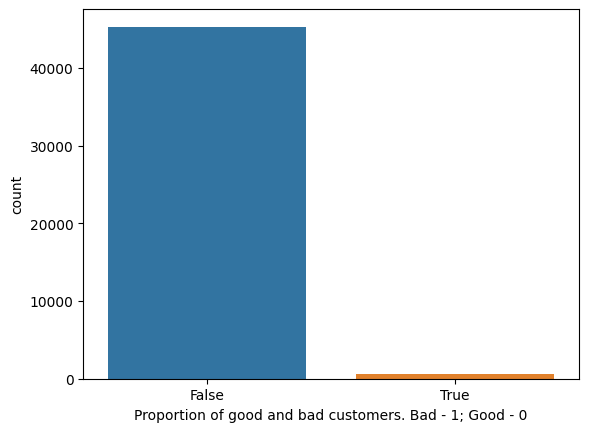

In [15]:
# Let's see how many clients are good (can be potentially considered by the banks) and bad clients

sns.countplot(data=completed_feature_dataset, x="bad_client")
plt.xlabel("Proportion of good and bad customers. Bad - 1; Good - 0")

In [16]:
# Let's investigate majority class to get more information about it 

data = completed_feature_dataset

In [17]:
# let's try different techniques for managing imbalanced datasets

In [18]:
# Sampling Techniques for dealing with imbalanced datasets
import typing, logging
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
import pandas 
import constants 

Logger = logging.getLogger(__name__)

def rose_over_sampling(
    X_train: typing.Union[pandas.DataFrame, pandas.Series],
    Y_train: pandas.Series
):
    if not len(X_train) or not len(Y_train): return None, None
    try:
        sampler  = RandomOverSampler(random_state=1)
        X_resampled, Y_resampled = sampler.fit_resample(X=X_train, y=Y_train)
        return X_resampled, Y_resampled 
    except(TypeError, ValueError) as sampling_exception:
        Logger.debug("Failed to perform ROSE Over Sampling Technique, Exception Arised. [%s]"
        % sampling_exception)
        return None, None

def rose_under_sampling(X_train: pandas.DataFrame, Y_train: pandas.Series):
    if not len(X_train) or not len(Y_train): return None, None
    try:
        sampler = RandomUnderSampler(random_state=1)
        X_resampled, Y_resampled = sampler.fit_resample(X=X_train, y=Y_train)
        return X_resampled, Y_resampled 
    except(TypeError, ValueError) as sampling_exception:
        Logger.debug("Failed to perform ROSE Under Sampling Technique, Exception Arised. [%s]"
        % sampling_exception)
        return None, None
    

def smote_sampling(
    X_train: typing.Union[pandas.DataFrame, pandas.Series], 
    Y_train: typing.Union[pandas.DataFrame, pandas.Series]):

    if not len(X_train) or not len(Y_train): return None, None 
    try:
        smote_tech = SMOTE(random_state=1, k_neighbors=constants.K_SMOTE_NEIGHBORS)
        X_resampled, Y_resampled = smote_tech.fit_resample(X_train, Y_train)
        return X_resampled, Y_resampled
    except(TypeError, ValueError) as train_exception:
        Logger.debug("Failed to balance data using SMOTE Technique, exception raised. [%s]" % train_exception)
        return None, None 


In [19]:
# let's split data and try out SMOTE method on our data

X_data = data.drop(columns=["bad_client"])
Y_data = data["bad_client"]

from sklearn.model_selection import train_test_split 

# Splitting data on training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=1)

# Transforming each dataset individually 

SM_XR_sampled, SM_YR_sampled = smote_sampling(X_train, Y_train)

In [20]:
# Let's visualize new data
SM_YR_sampled.value_counts()

bad_client
False    33995
True     33995
Name: count, dtype: int64

<Axes: ylabel='count'>

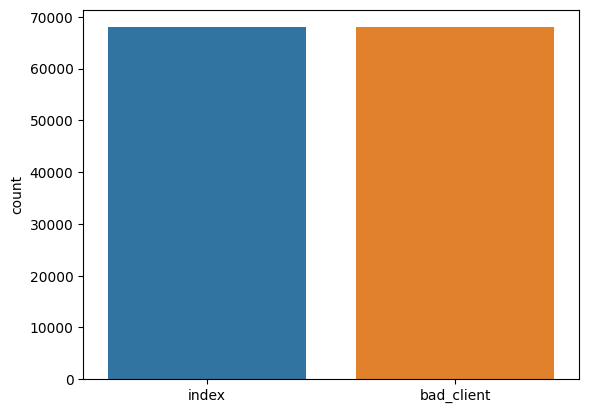

In [21]:
# Performing Feature Encodings to the dataset
sns.countplot(SM_YR_sampled.reset_index())

In [22]:
# Merging with application records feature dataset
credit_feature_dataset = pandas.concat([SM_XR_sampled, SM_YR_sampled], axis=1)

origin_dataset = credit_feature_dataset.merge(applications, on="client_id")

feature_dataset = pandas.DataFrame() # main dataframe, containing all features

# Dropping duplicated rows
origin_dataset.drop_duplicates(inplace=True)
origin_dataset.reset_index(inplace=True)

In [23]:
# Imputing missing values before encoding

feature_dataset.isna().sum()

Series([], dtype: float64)

In [24]:
# Using Mode Imputation for Nominal Categorical Feature 'Job'
MISSING_JOB = "missing_job"
feature_dataset['job'] = origin_dataset['job'].fillna(MISSING_JOB)


In [25]:
# Using Imputation for Education and Family Status categories 

import math 

feature_dataset['client_id'] = origin_dataset['client_id']
feature_dataset['credit_window'] = origin_dataset['credit_window']
feature_dataset['bad_client'] = origin_dataset['bad_client']

feature_dataset['family_size'] = origin_dataset['family_size']
feature_dataset['total_children'] = origin_dataset['total_children']

feature_dataset['living_place'] = origin_dataset['living_place'].apply(func=lambda item: item.lower())
feature_dataset['education_category'] = origin_dataset['education_category'].apply(func=lambda item: item.lower()) 
feature_dataset['family_status'] = origin_dataset['family_status'].apply(func=lambda item: item.lower())
feature_dataset['income_category'] = origin_dataset['income_category'].apply(func=lambda item: item.lower())

feature_dataset['employed']  = origin_dataset['days_employed'].apply(func=lambda day: False if day > 0 else True)
feature_dataset['age'] = origin_dataset['birthday'].apply(func=lambda day: math.floor(abs(day) / 365))

In [26]:
# Checking the imputation status 
feature_dataset.isna().sum()

job                   0
client_id             0
credit_window         0
bad_client            0
family_size           0
total_children        0
living_place          0
education_category    0
family_status         0
income_category       0
employed              0
age                   0
dtype: int64

In [27]:
# Standardizing numeric data features 

from sklearn.preprocessing import StandardScaler
numeric_features = feature_dataset.select_dtypes(include='number').columns.tolist()

print(numeric_features)

def scale_numeric_features(data: pandas.DataFrame): 
    # Scaling Numeric Features using Standard Scaler
    scaler = StandardScaler() 
    scaled_data = pandas.DataFrame(data=scaler.fit_transform(data), columns=data.columns)
    return scaled_data 
 
# Encoding Numeric Features 
feature_dataset[numeric_features] = scale_numeric_features(feature_dataset[numeric_features])
feature_dataset

['client_id', 'credit_window', 'family_size', 'total_children', 'age']


,job,client_id,credit_window,bad_client,family_size,total_children,living_place,education_category,family_status,income_category,employed,age
0,Core staff,0.919043,-1.285300,False,0.866409,0.751318,house / apartment,secondary / secondary special,married,commercial associate,True,-0.276702
1,Core staff,0.919043,-0.827537,True,0.866409,0.751318,house / apartment,secondary / secondary special,married,commercial associate,True,-0.276702
2,Laborers,0.593676,-1.416090,False,-0.218912,-0.567144,house / apartment,higher education,married,working,True,-1.229664
3,missing_job,-1.375118,-0.042799,False,0.866409,0.751318,house / apartment,secondary / secondary special,married,working,True,0.416362
4,Cooking staff,-0.754756,1.134307,False,-0.218912,-0.567144,house / apartment,secondary / secondary special,married,commercial associate,True,0.416362
...,...,...,...,...,...,...,...,...,...,...,...,...
43098,missing_job,-1.089757,-0.369773,True,0.866409,0.751318,house / apartment,secondary / secondary special,married,working,True,-0.536601
43099,Cooking staff,-1.199428,-0.762142,True,-1.304234,-0.567144,house / apartment,secondary / secondary special,single / not married,working,True,1.022793
43100,Core staff,1.562864,0.938122,True,-0.218912,-0.567144,house / apartment,secondary / secondary special,married,working,True,0.849527
43101,missing_job,-0.916220,1.199701,True,-0.218912,-0.567144,house / apartment,secondary / secondary special,married,pensioner,False,1.282692


In [28]:
# Encoding Binary Features

def encode_binary_features(feature_set: pandas.DataFrame, binary_dataset: pandas.DataFrame):
    """
    Function encodes binary features to corresponding boolean values 
    Yes - True
    No - False
    
    It is implied to convert binary features to appropriate format, because 
    some models does not do well with categorical variables and requires feature tranformation
    
    Args:
        dataset: input dataset, which contains binary features
    """
    try:
        for feature in binary_dataset.columns:
            feature_set[feature] = binary_dataset[feature].apply(
                func=lambda item: True if item == "Y" else False
            )
    except(pandas.Warning) as exception_warning:
        Logger.debug(
        "Warning occured, while applying function to dataframe features: '%s'" % (exception_warning)
        )
        raise NotImplemented("Failed to encode binary features")
    
def encode_gender_feature(gender_feature: pandas.Series) -> pandas.DataFrame:
    """
    Encodes Gender Feature using One-Hot Encoding
    Args:
        gender_feature - pandas.Series object, which contains 
        about the client's gender
    """
    gender_features = pandas.get_dummies(gender_feature).rename(
    columns={'F': 'Female', 'M': 'Male'})
    return gender_features


binary_features = ["has_car", "has_mobile_phone", 
"has_phone", "has_email", "has_work_phone", "has_realty"]

encode_binary_features(feature_dataset, origin_dataset[binary_features])
gender_features = encode_gender_feature(origin_dataset['gender'])

# combining with encoded gender frame 
feature_dataset = pandas.concat([feature_dataset, gender_features], axis=1)

feature_dataset[binary_features]

,has_car,has_mobile_phone,has_phone,has_email,has_work_phone,has_realty
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,True,False,False,False,False,True
3,True,False,False,False,False,True
4,True,False,False,False,False,True
...,...,...,...,...,...,...
43098,False,False,False,False,False,True
43099,False,False,False,False,False,True
43100,False,False,False,False,False,True
43101,False,False,False,False,False,True


In [29]:
# Encoding Multi class categorical features 

In [30]:
# Analyzing Education Category 

feature_dataset['education_category'].nunique()

5

In [31]:
# There are 5 unique groups in the Education Category Dataset Feature 
# Let's review each of the them 
feature_dataset['education_category'].unique()

array(['secondary / secondary special', 'higher education',
       'incomplete higher', 'lower secondary', 'academic degree'],
      dtype=object)

In [32]:
# Education Data has certain airarphy, in that case, we can consider applying Ordinal Encoder 

from sklearn.preprocessing import OrdinalEncoder 


def scale_hierarhical_feature(feature_name: str, dataset: pandas.DataFrame, categories: typing.List[str]):
    """
    Function scales feature using Ordinal Encodind
    
    Notes:
        1. Feature should have logical hierarchy, otherwise it would not make sense
        Common example is school grades: 2, 3, 4, 5, which denotes corresponding feedback about work 
        in hierarchical order
        
    Args:
        1. feature_name: name of the feature, that should be encoded
        2. categories: hierarchically ordered list of categories (from top to bottom)
        
    Returns:
        pandas.Series object with ordinal-encoded values
    """
    if feature_name not in dataset.columns: 
        raise AttributeError("Specified Feature is not presented in the dataset")
            
    if dataset[feature_name].isna().sum() > 0: 
        raise ValueError("Series contains null values")
        
    scaler = OrdinalEncoder(categories=[categories]) 
    scaled_data = scaler.fit_transform(dataset[[feature_name]])
    return scaled_data

# Updating Education Category Labels

feature_dataset['education_category'] = feature_dataset['education_category'].map({
    'secondary / secondary special': 'special secondary',
    'incomplete higher': 'incomplete higher education',
    'academic degree': 'academic degree',
    'higher education': 'higher education',
    'lower secondary': 'lower secondary'
})


feature_dataset["education_category"] = scale_hierarhical_feature(
    feature_name="education_category",
    dataset=feature_dataset,
    categories=[
    "academic degree",
    "higher education",
    "incomplete higher education",
    "special secondary",
    "lower secondary",
    ]
)



In [33]:
# Encoding Family Status categorical feature

In [34]:
# Estimating which approach would be the most applicable in our case scenario 

In [35]:
def encode_family_status(feature_series: pandas.Series):
    if feature_series.isna().sum() > 0: 
        raise TypeError("Feature Series contains null values")
    try:
        return pandas.get_dummies(feature_series)
    except(TypeError, ValueError, AttributeError) as exc:
        Logger.error(exc)
        return numpy.full(shape=(len(feature_series), 1), 
        fill_value="unknown value", dtype=str)
        
if 'family_status' in feature_dataset.columns:
    encoded_family_status = encode_family_status(origin_dataset['family_status'])

    # concatenating tables together 
    feature_dataset = pandas.concat([feature_dataset, 
    encoded_family_status], axis=1)

feature_dataset.head(5)


,job,client_id,credit_window,bad_client,family_size,total_children,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,Core staff,0.919043,-1.285300,False,0.866409,0.751318,house / apartment,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
1,Core staff,0.919043,-0.827537,True,0.866409,0.751318,house / apartment,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
2,Laborers,0.593676,-1.416090,False,-0.218912,-0.567144,house / apartment,1.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,missing_job,-1.375118,-0.042799,False,0.866409,0.751318,house / apartment,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
4,Cooking staff,-0.754756,1.134307,False,-0.218912,-0.567144,house / apartment,3.0,married,commercial associate,...,False,False,True,False,True,False,True,False,False,False


In [36]:
# Analyzing Living Place category
origin_dataset['living_place'].nunique()

6

In [37]:
origin_dataset['living_place'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [38]:
# Encoding Living Place Category

# encoding 'living place' feature

feature_dataset['living_place'] = scale_hierarhical_feature(
    "living_place", 
    origin_dataset,
    [
        "Co-op apartment",
        'Office apartment',
        'Municipal apartment',
        'House / apartment',
        'Rented apartment',
        'With parents'
    ]
)


In [39]:
# showcasing encoded features 
feature_dataset.head(10)

,job,client_id,credit_window,bad_client,family_size,total_children,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,Core staff,0.919043,-1.285300,False,0.866409,0.751318,3.0,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
1,Core staff,0.919043,-0.827537,True,0.866409,0.751318,3.0,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
2,Laborers,0.593676,-1.416090,False,-0.218912,-0.567144,3.0,1.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,missing_job,-1.375118,-0.042799,False,0.866409,0.751318,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
4,Cooking staff,-0.754756,1.134307,False,-0.218912,-0.567144,3.0,3.0,married,commercial associate,...,False,False,True,False,True,False,True,False,False,False
5,Cooking staff,-0.754756,0.284174,True,-0.218912,-0.567144,3.0,3.0,married,commercial associate,...,False,False,True,False,True,False,True,False,False,False
6,Cooking staff,-0.754756,0.938122,True,-0.218912,-0.567144,3.0,3.0,married,commercial associate,...,False,False,True,False,True,False,True,False,False,False
7,Waiters/barmen staff,1.093597,-0.565958,False,-0.218912,-0.567144,3.0,3.0,married,state servant,...,False,False,True,True,False,False,True,False,False,False
8,missing_job,-1.368940,-1.154511,False,-0.218912,0.751318,4.0,3.0,single / not married,working,...,False,False,False,True,False,False,False,False,True,False
9,missing_job,-1.368940,-0.827537,True,-0.218912,0.751318,4.0,3.0,single / not married,working,...,False,False,False,True,False,False,False,False,True,False


In [40]:
# Analyzing Income category feature 

In [41]:
feature_dataset['income_category'].unique()

array(['commercial associate', 'working', 'state servant', 'pensioner',
       'student'], dtype=object)

In [42]:
feature_dataset['income_category'].nunique() 

5

In [43]:
feature_dataset['income_category'].unique()

array(['commercial associate', 'working', 'state servant', 'pensioner',
       'student'], dtype=object)

In [44]:
# Encoding Job Feature using Binary Encoding

def encode_income_category_feature(feature_dataset: pandas.Series):
    """
    """
    work_cats = ["Working", "Commercial Associate", "state servant"]
    return feature_dataset.apply(
        func=lambda item: True if item in work_cats else False
    )

feature_dataset['job'] = encode_income_category_feature(feature_dataset['job'])


In [45]:
# Let's see how many unique categories we got
feature_dataset['job'].nunique()

1

In [46]:
# Let's take a quick look on these categories 
feature_dataset['job'].unique()

array([False])

In [47]:
from sklearn.model_selection import KFold
from category_encoders import TargetEncoder


def encode_job_feature(x_y_frame: pandas.DataFrame) -> pandas.DataFrame:
    """
    Encodes Job Feature using K-Fold Target Encoding.
    This choice stands beyond the large number of categories feature has, as well, as 
    this type of target encoding technique is the most benefitial, provides better estimations, 
    avoid data leakage and internal bias 
    
    Args:
        1. feature_set: pandas.Series object, containing values of the feature (aka. feature itself)
        
    Returns:
        pandas.Series object with encoded values
    
    Note:
        1. Feature should not contain any NaN values at the input, exception will be thrown otherwise
    """
    if not 'job' in x_y_frame.columns: raise ValueError("Job Feature is missing")
    if not 'bad_client' in x_y_frame.columns: raise ValueError('Target Feature is missing')
    
    kf = KFold(n_splits=constants.K_FOLD_SPLITS, shuffle=True, random_state=1)
    target_encoder = TargetEncoder(cols=['job'])
    encoded_data = pandas.DataFrame()
    
    for train_idx, val_idx in kf.split(x_y_frame):
        training_data = x_y_frame.iloc[train_idx]
        validation_data = x_y_frame.iloc[val_idx]
        
        target_encoder.fit(training_data['job'], training_data['bad_client'])
        enc_val_data = target_encoder.transform(validation_data['job'])
        encoded_data = pandas.concat([encoded_data, enc_val_data], axis=0)
    
    return encoded_data['job']

# Encoding Job Feature

feature_dataset['job'] = encode_job_feature(feature_dataset[['job', 'bad_client']])
    
feature_dataset
    

,job,client_id,credit_window,bad_client,family_size,total_children,living_place,education_category,family_status,income_category,...,has_email,has_work_phone,has_realty,Female,Male,Civil marriage,Married,Separated,Single / not married,Widow
0,0.374372,0.919043,-1.285300,False,0.866409,0.751318,3.0,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
1,0.376099,0.919043,-0.827537,True,0.866409,0.751318,3.0,3.0,married,commercial associate,...,False,False,False,True,False,False,True,False,False,False
2,0.375232,0.593676,-1.416090,False,-0.218912,-0.567144,3.0,1.0,married,working,...,False,False,True,False,True,False,True,False,False,False
3,0.375052,-1.375118,-0.042799,False,0.866409,0.751318,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
4,0.375351,-0.754756,1.134307,False,-0.218912,-0.567144,3.0,3.0,married,commercial associate,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43098,0.375232,-1.089757,-0.369773,True,0.866409,0.751318,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
43099,0.376924,-1.199428,-0.762142,True,-1.304234,-0.567144,3.0,3.0,single / not married,working,...,False,False,True,True,False,False,False,False,True,False
43100,0.376099,1.562864,0.938122,True,-0.218912,-0.567144,3.0,3.0,married,working,...,False,False,True,True,False,False,True,False,False,False
43101,0.376279,-0.916220,1.199701,True,-0.218912,-0.567144,3.0,3.0,married,pensioner,...,False,False,True,True,False,False,True,False,False,False


In [48]:
# Feature Selection

In [50]:
# Reducing Noise and Dropping Redundant Features

feature_dataset.drop(
    columns=[
        "client_id",
        "Civil marriage",
        "Separated",
        "Widow",
        "Single / not married",
        "family_status",
        "income_category"
    ], inplace=True
)

KeyError: "['client_id', 'Civil marriage', 'Separated', 'Widow', 'Single / not married', 'family_status', 'income_category'] not found in axis"

In [51]:
feature_dataset

,job,credit_window,bad_client,family_size,total_children,living_place,education_category,employed,age,has_car,has_mobile_phone,has_phone,has_email,has_work_phone,has_realty,Female,Male,Married
0,0.374372,-1.285300,False,0.866409,0.751318,3.0,3.0,True,-0.276702,False,False,False,False,False,False,True,False,True
1,0.376099,-0.827537,True,0.866409,0.751318,3.0,3.0,True,-0.276702,False,False,False,False,False,False,True,False,True
2,0.375232,-1.416090,False,-0.218912,-0.567144,3.0,1.0,True,-1.229664,True,False,False,False,False,True,False,True,True
3,0.375052,-0.042799,False,0.866409,0.751318,3.0,3.0,True,0.416362,True,False,False,False,False,True,True,False,True
4,0.375351,1.134307,False,-0.218912,-0.567144,3.0,3.0,True,0.416362,True,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43098,0.375232,-0.369773,True,0.866409,0.751318,3.0,3.0,True,-0.536601,False,False,False,False,False,True,True,False,True
43099,0.376924,-0.762142,True,-1.304234,-0.567144,3.0,3.0,True,1.022793,False,False,False,False,False,True,True,False,False
43100,0.376099,0.938122,True,-0.218912,-0.567144,3.0,3.0,True,0.849527,False,False,False,False,False,True,True,False,True
43101,0.376279,1.199701,True,-0.218912,-0.567144,3.0,3.0,False,1.282692,False,False,False,False,False,True,True,False,True


<Axes: >

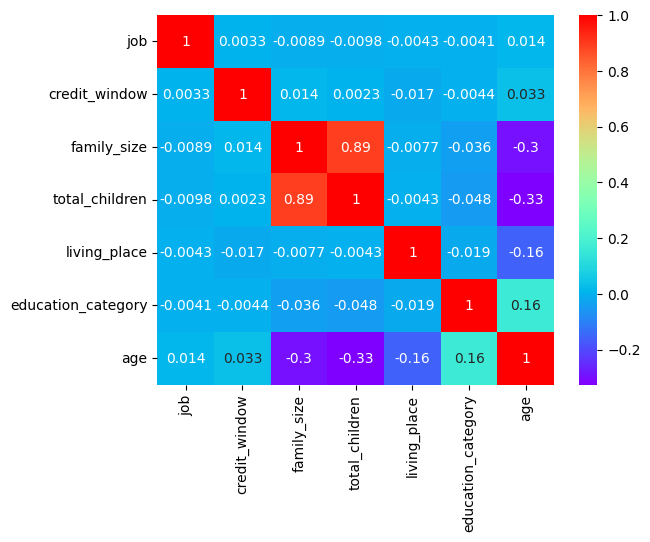

In [67]:
# let's take a look on correlation between these variables
num_features = feature_dataset.select_dtypes(include='number')
sns.heatmap(num_features.corr(), cmap='rainbow', annot = True)


In [52]:
# Feature selection using RandomForestClassifier
# Also need to consider Permutation Importance, Stat Tests

In [56]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel 


def split_data(X_features, Y_feature):
    """
    Splits data using simple train_test_split method from scikit-learn library
    """

    X_train, X_test, Y_train, Y_test = train_test_split(
            X_features, 
            Y_feature, 
            random_state=1, 
            test_size=0.3
    )
    return X_train, X_test, Y_train, Y_test


def train_importance_classifier(X_dataset, Y_dataset) -> typing.List[str]:
    """
    Functions trains Random Forest Classifier using X_dataset and Y_dataset 
    Implements Embedded Method Feature Selection using Random Forest 
    
    Args:
        1. X_dataset - pandas.DataFrame object containing independent features 
        2. Y_dataset - pandas.Series object containing dependent target feature
    
    Returns:
        1. List of features, which has high importance score (more than mean, across the entire feature set)
    """
    
    classifier = RandomForestClassifier(n_estimators=constants.RANDOM_FOREST_FEATURE_SELECTION_EST)
    selector = SelectFromModel(classifier)
    selector.fit(X_dataset, Y_dataset)
    important_features = selector.get_support() 
    return [X_dataset.columns[idx] for idx in range(len(X_dataset.columns)) if important_features[idx]]

X_dataset = feature_dataset.drop(columns=["bad_client"],inplace=False)
Y_dataset = feature_dataset['bad_client']

important_features = train_importance_classifier(X_dataset, Y_dataset)

important_features

['job', 'credit_window', 'age']

In [161]:
# Selecting models and apply hyperparameter tuning

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import recall_score

# we have a huge number of samples (< 100 000), so it's a great idea to use GridSearchCV
# but either RandomizedSearchCV or BayesSearchCV

models: typing.Dict[str, BaseEstimator] = {
    "knn": KNeighborsClassifier(), 
    "decision_tree": DecisionTreeClassifier(),
}

models_hyper_information = {
    "knn": {
        'n_neighbors': list(range(1, 21, 2)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski'],
    },
    "decision_tree": {
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"],
    }
}

optimal_hyper_parameters = {
    key: {'scores': {}, 'params': {}}
    for key in models.keys()
} # result hashmap, where we store optimal hyper parameters for the model

# splitting data into test and training set 

x_set, y_set = feature_dataset[important_features], feature_dataset['bad_client']

# filling models hyper information

def get_recall_score(x, y, model_name, params):
    """
    """
    try:
        if model_name == "knn":
            model = KNeighborsClassifier(**model_params)
            
        elif model_name == "decision_tree":
            model = DecisionTreeClassifer(**model_params)
            
        elif model_name == "random_forest":
            model = RandomForestClassifier(**model_params)
        else:
            raise RuntimeError("Invalid model has been selected '%s'" % model_name)
            
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        model.fit(x_train, y_train)
        bad_client_pred = model.predict(x_test)
        return recall_score(y_test, y_pred)
    except():
        Logger.error('failed to predict recall score using model %s' % (model.__class__.__name__))
        raise NotImplemented

def apply_informed_search_cv(
    x_set: pandas.DataFrame, 
    y_set: pandas.Series, 
    model_name: str, 
    metric: typing.Literal['precision', 'recall'],
    hyperparams: typing.Dict,
    folds=10, 
):
    """
    Function applies HyperParameter Tuning using InformedSearch, based on Bayesian Search
    
    Args:
        1. x_set: pandas.DataFrame object, represents set of independent features,
        2. y_set: pandas.Series object, represents target feature,
        3. model: Machine Learning Model for tuning,
        4. folds: number of splits for cross-validation,
        5. hyperparams: default hyperparams of the model
        6. metric: priority metric for the model
    """
    if not len(x_train) or not len(y_train):
        raise ValueError("X or Y datasets are empty")
        
    new_cvs = GridSearchCV(
        estimator=models[model_name],
        param_grid=hyperparams,
        scoring=metric,
        cv=StratifiedKFold(n_splits=folds),
        error_score='raise',
        n_jobs=-1,
    )
    new_cvs.fit(x_set, y_set)
    
    precision_score = new_cvs.best_score_
    recall_score = get_recall_score(model_name, new_cvs.best_params_)
    
    optimal_hyper_parameters[model_name]['params'][metric] = new_cvs.best_params_ 
    optimal_hyper_parameters[model_name]['scores'][metric] = new_cvs.best_score_

# Applying Hyperparameter tuning for each model

for model in models.keys():
    try:
        print('training %s...' % (model))
        apply_informed_search_cv(
            x_set=x_set,
            y_set=y_set,
            model_name=model,
            metric=metric,
            folds=10,
            hyperparams=models_hyper_information[model]
        )
    except(KeyError) as err:
        raise NotImplemented

# Applying Hyperparameter Tuning for each model in the dataset

optimal_hyper_parameters 


training knn...
0.5214457620277073
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


TypeError: object.__new__(): not enough arguments

Text(0.5, 1.0, 'Reclal Model Scores')

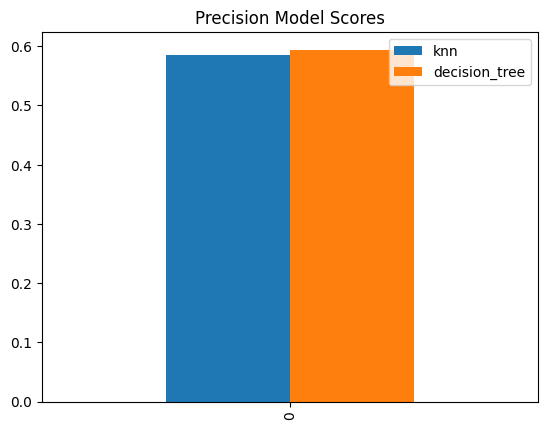

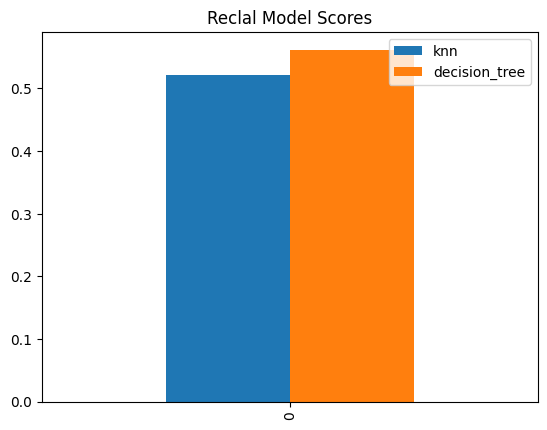

In [154]:
# let's visualize our precision scores 
model_labels = ['knn', 'decision_tree', 'logistic_regression']
metric_data = dict(zip(model_labels, optimal_hyper_parameters.values()))

precision_data = {key: [metric_data[key]['scores']['precision']] for key in metric_data.keys()}
recall_data = {key: [metric_data[key]['scores']['recall']] for key in metric_data.keys()}
precision_dataframe = pandas.DataFrame(precision_data)
recall_dataframe = pandas.DataFrame(recall_data)

ax_precision = precision_dataframe.plot(kind='bar')
ax_recall = recall_dataframe.plot(kind='bar')

ax_precision.set_title(label='Precision Model Scores')
ax_recall.set_title(label="Reclal Model Scores")

In [53]:
# We've extracted most important features and now it's time for Cross-Validation and Modeling

In [ ]:
# Now, let's discuss, what metrics do we need to use for our project

In [ ]:
from sklearn.metrics import precision_score 
from sklearn.model_selection import cross_validate 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import KNeighborsClassifier
import dataclasses

from sklearn.base import BaseEstimator 

@dataclasses.dataclass
class ChosenModel(object):
    """
    Class instance represents final cross-validation best choice 
    Args:
        model: best model
        metric_accuracy: precision score of the model 
    """
    model: BaseEstimator = None # best fit model
    metric_accuracy: float = 0 # precision score
        

def cross_validation(models: typing.List[BaseEstimator], x_set, y_set, metrics: typing.List, folds=5) -> ChosenModel:
    """
    Implements Cross-Validation Technique for finding the best model
    that fits metric the most
    
    Args:
        1. x_set: pandas.DataFrame object, containing independent features 
        2. y_set: pandas.Series object, containing dependent feature
        3. metrics: priorotized list of metrics for the model 
        4. folds: number of folds for cross-validation 
    
    Returns:
        BestChosenModel - best chosen model
    """
    if not len(models): 
        raise ValueError('no model has been selected')
        
    if not len(x_set) or not len(y_set): 
        raise ValueError("x or y dataset does not contain any features")
        
    bestModel = ChosenModel()
    for model in range(len(models)):
        
        scores = cross_validate(
                estimator=models[model].__class__(**optimal_hyper_parameters[models[model]]),
                X=x_set,
                y=y_set,
                cv=folds,
                scoring=metrics,
                return_train_score=True
        )
        if scores['train_precision'] >= bestModel.metric_accuracy:
            bestModel.model = models[model]
            bestModel.metric_accuracy = scores['train_precision']
    return bestModel 

def select_base_model(x_set, y_set, metrics):
    best_model = cross_validation(
        models.values(),x_set, y_set, metrics
    )
    return best_model
